In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, os
from prophet import Prophet

In [7]:
hist = pd.read_csv('./scraped-data/caiso-net-demand.csv')
hist.index = pd.to_datetime(hist['Timestamp'])
hist.drop('Timestamp', axis=1, inplace=True)
hist

,Hour-ahead forecast,Demand,Net demand
Timestamp,,,
2018-04-10 00:00:00,22701.0,22459.0,22117.0
2018-04-10 00:05:00,22311.0,22371.0,21955.0
2018-04-10 00:10:00,22311.0,22330.0,21882.0
2018-04-10 00:15:00,22311.0,22082.0,21774.0
2018-04-10 00:20:00,22094.0,21978.0,21613.0
...,...,...,...
2022-06-02 23:35:00,25260.0,25646.0,20660.0
2022-06-02 23:40:00,25260.0,25495.0,20522.0
2022-06-02 23:45:00,25260.0,25339.0,20378.0


In [8]:
from prophet import Prophet

# use hourly average data as input to forecasting model
hourly = hist.resample('H').mean()
ds, y = hourly.index, hourly['Net demand']


hist_bare = pd.DataFrame({'ds': ds, 'y': y})
hist_bare.reset_index(inplace=True)
hist_bare.drop('Timestamp', inplace=True, axis=1)

m = Prophet()
m.fit(hist_bare)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [9]:
future = m.make_future_dataframe(periods=4*8760, freq='H', include_history=True)
forecast = m.predict(future)

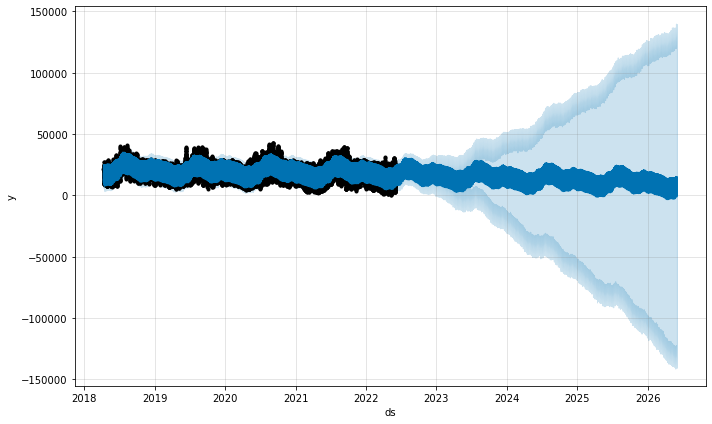

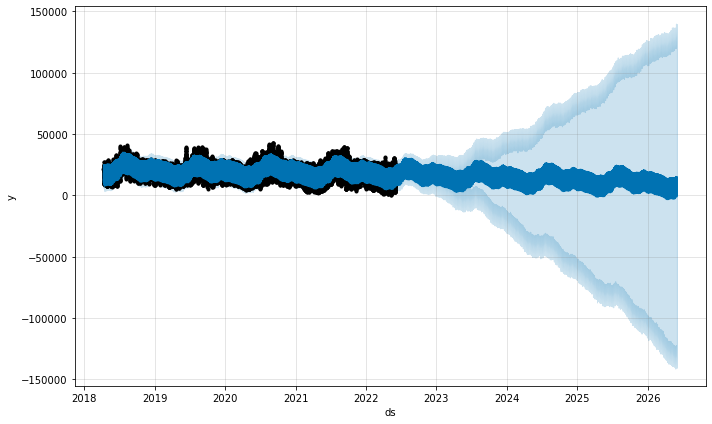

In [13]:
from prophet.plot import plot_plotly, plot_components_plotly


#### restart kernel and make these plots
# plot_plotly(m, forecast)
# plot_components_plotly(m, forecast)


m.plot(forecast)
# m.plot_components(forecast)

#### Next: 
* Make forecasts with hourly, daily, weekly frequencies
* plot forecasts with matplotlib
* Give forecasts datetime indices 
* Start doing math
    * What's the defecit on a daily, weekly, and monthly basis? 
    * What's the power defecit at any time? 
    * When will we reach net 0 for a whole day (excluding storage)? 
    * When will we reach net 0 for a whole week (excluding storage)? 
    * What's the energy defecit we need to overcome using storage? 